In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import pandas as pd
from helpers import *
from scipy.stats import pearsonr
from scipy.stats import linregress
import matplotlib.gridspec as gridspec

In [2]:
num_topics = 100
d = "topics/topics_"+str(num_topics)+"/"
sns.set(style='whitegrid')

In [3]:
print("Loading books...")
books = get_book_txts("data/coref_resolved_txts", splitlines=True)

Loading books...
Getting books...
America_A_Narrative_History_WWNorton_10th
America_Past_And_Present_Pearson_10th
Americas_History_Bedford_8th
Give_Me_Liberty_An_American_History_WWNorton_3rd
The_American_Pageant_Cengage_14th
The_Unfinished_Nation_A_Concise_History_of_the_American_People_McGraw-Hill_8th
Visions_of_America_A_History_of_the_United_States_Pearson_2nd
american_history_connecting_with_the_past
by_the_people
history_alive_united_states_thru_industrialism
hmh_the_americans_us_history_since_1877
mastering_the_teks
pearson_us_history
teks_us_history
us_history_early_colonial_period_through_reconstruction


In [4]:
means = []
medians = []
for k, v in books.items():
    paragraphs = [len(s.split()) for s in v]
    means.append(np.mean(paragraphs))
    medians.append(np.median(paragraphs))
print(np.mean(means))
print(np.std(means))
print(np.min(means))
print(np.max(means))

67.67266705716371
33.98822054458773
27.436693866807055
129.7970099667774


In [5]:
print('Combining data and cleaning data...')
book_texts = {}
for k, v in books.items():
    book_texts[k] = [' '.join(clean_text(sent,
                                         stem=False,
                                         remove_short=False,
                                         remove_stopwords=False)) for l in v for sent in
                     nltk.sent_tokenize(l)]


titles = sorted(books.keys())
all_text = []
book2length = []
for title in titles:
    texts = book_texts[title]
    book2length.append((title, len(texts)))
    for t in texts:
        all_text.append(t)

Combining data and cleaning data...


In [ ]:
means = []
medians = []
for k, v in book_texts.items():
    paragraphs = [len(s.split()) for s in v]
    means.append(np.mean(paragraphs))
    medians.append(np.median(paragraphs))
print(np.mean(means))
print(np.std(means))
print(np.min(means))
print(np.max(means))

In [6]:
all_text[:10]

['history is filled with ironies',
 'luck and accidents the unexpected and unplanned happenings of life often shape events more than intentions',
 'long before christopher columbus lucked upon the caribbean sea and an unexpected continent in his effort to find a westward passage to the indies east asia the native peoples his mislabeled indians had occupied and transformed the lands of the western hemisphere also called the americas north central and south',
 'initially everyone in what came to be called america came from somewhere else',
 'by when columbus began his voyage west from spain across an uncharted ocean there were millions of native americans living in the western hemisphere',
 'the new world his found was new only to the europeans who began exploring conquering and exploiting the region at the end of the fifteenth century',
 'over thousands of years native american peoples had developed highly sophisticated societies',
 'some were rooted in agriculture others focused on tra

## Average sentence length

In [7]:
sent_lengths = []
for k, v in book_texts.items():
    sent_lengths.extend([len(sent.split(" ")) for sent in v])

In [8]:
np.median(sent_lengths)

16.0

In [9]:
np.std(sent_lengths)

11.64063336364327

## Examine topics

In [7]:
doc_topic_file =  d+ 'doc-topics.gz'
doc_topics = open(doc_topic_file).read().splitlines()
print(len(doc_topics), 'articles total')

384836 articles total


In [8]:
all_text = []
book2length = []
for title, texts in book_texts.items():
    book2length.append((title, len(texts)))
    for t in texts:
        all_text.append(t)

In [9]:
topic_names = json.load(open(d + 'topic_names.json', 'r'))

In [10]:
topic_names

{'0': 'nixon,hous,senat,secretari,presid,investig,appoint,offic,committe,administr',
 '1': 'iraq,bush,israel,presid,forc,troop,iran,unit state,attack,iraqi',
 '10': 'god,christian,religi,thoreau,emerson,believ,protest,religion,bibl,puritan',
 '11': 'mexico,mexican,texa,california,territori,unit state,polk,new,spanish,republ',
 '12': 'chang,polit,societi,social,life,econom,cultur,new,revolut,way',
 '13': 'build,citi,built,park,hous,construct,new york,design,water,public',
 '14': 'historian,question,differ,evid,whether,fact,present,debat,argu,view',
 '15': 'abolitionist,slaveri,garrison,women,antislaveri,frederick douglass,stanton,convent,john brown,anti',
 '16': 'communist,soviet union,soviet,china,truman,cold war,polici,communism,unit state,eisenhow',
 '17': 'armi,militari,serv,soldier,offic,servic,men,volunt,war,draft',
 '18': 'percent,million,popul,number,near,half,total,increas,rate,live',
 '19': 'vietnam,south,troop,north,vietnames,communist,forc,korea,militari,north vietnames',
 '

In [11]:
len(doc_topics)

384836

In [12]:
len(all_text)

384836

In [13]:
def get_topic_for_doc(doc_id, printout=True):
    doc = all_text[doc_id]
    if printout:
        print(doc)
        print(doc_topics[doc_id])
    topics = doc_topics[doc_id].strip().split()[2:]
    topics = set([i for (i, v) in enumerate(topics)
                         if float(v) > 0.1])
    if printout:
        print("Topics:")
        for t in topics:
            print(topic_names[str(t)])
    return len(topics)

In [14]:
get_topic_for_doc(9)

as the two different societies european and native a merican collided each having native a s own distinct heritage and worldview indian peoples were exploited infected enslaved displaced and exterminated
9	10	4.198587728661247E-4	3.0997325738785355E-4	5.232041839231429E-4	6.364726189192444E-4	4.506477551540896E-4	0.27924597821130404	4.7839614099372886E-4	6.315162180276007E-4	0.0011216676367843616	9.697266690217265E-4	3.081403784548008E-4	4.062204538836523E-4	9.721370894037563E-4	3.7172581118516726E-4	6.977858823198785E-4	2.5073323303222676E-4	4.5785092832627413E-4	3.832140930809466E-4	6.937460411549183E-4	3.167325123585466E-4	6.821955357653399E-4	6.794264162808036E-4	5.288895785667366E-4	3.561348922570943E-4	4.5348867771719567E-4	0.0011347032460488524	6.483851483913993E-4	3.759449767722207E-4	2.6397662832962056E-4	8.661238367430206E-4	5.064302607466158E-4	6.880698627984919E-4	5.643014997626091E-4	5.699284626212508E-4	3.7954389724310927E-4	3.349068452466892E-4	6.560655743426813E-4	4.171

2

In [15]:
doc_topic_counts = [get_topic_for_doc(i, printout=False) for i in range(len(doc_topics))]

In [16]:
np.mean(doc_topic_counts)

2.1917881902940475

In [17]:
np.median(doc_topic_counts)

2.0

In [18]:
np.std(doc_topic_counts)

0.8666802989650212

In [19]:
def verify_count_for_topic(topic_no):
    count = 0
    for t in doc_topics:
        topics = t.strip().split()[2:]
        if float(topics[topic_no]) > .2:
            count+=1
    return count

In [20]:
verify_count_for_topic(10)

4338

## Topics

In [21]:
def get_topic_for_word(word):
    topics = []
    for k, v in topic_names.items():
        if word in v:
            print(k, v)
            topics.append(int(k))
    return topics

In [22]:
def load_pmi(title=""):
    return np.load(d + title + '/pmi.npy')
def load_corr(title=""):
    return np.load(d + title + '/corr.npy')
def load_counts(title=""):
    return np.load(d + title + '/topic_count.npy')

In [23]:
titles = ["all", "America_A_Narrative_History_WWNorton_10th","America_Past_And_Present_Pearson_10th","american_history_connecting_with_the_past","Americas_History_Bedford_8th","by_the_people","Give_Me_Liberty_An_American_History_WWNorton_3rd","history_alive_united_states_thru_industrialism","hmh_the_americans_us_history_since_1877","mastering_the_teks","pearson_us_history","teks_us_history","The_American_Pageant_Cengage_14th","The_Unfinished_Nation_A_Concise_History_of_the_American_People_McGraw-Hill_8th","us_history_early_colonial_period_through_reconstruction","Visions_of_America_A_History_of_the_United_States_Pearson_2nd"]

In [24]:
with open('data/dem_per_book.json', 'r') as f:
    dem_per_book = json.load(f)

## Plotting

In [25]:
shape_mapper = get_shapes(abbr=True)
color_mapper = get_colors(abbr=True)

In [26]:
title_abbr = get_title_abbr()

In [27]:
def get_ratio_of_topic_prominence(topic1, topic2, name1, name2):
    df_ratio = []
    df_book = []
    df_dem = []
    for t in titles:
        # remove books that only cover half of US history
        if 'early' in t or 'industr' in t or 'since' in t:
            continue
        if t == 'all':
            continue
        df_book.append(title_abbr[t])
        df_dem.append(dem_per_book[t])
        counts = load_counts(t)
        prop = counts / np.sum(counts) * 100
        df_ratio.append(prop[topic1] / prop[topic2])
    return pd.DataFrame({'Book': df_book, 'ratio': df_ratio, 'dem': df_dem})

In [29]:
get_topic_for_word("slaveri")

15 abolitionist,slaveri,garrison,women,antislaveri,frederick douglass,stanton,convent,john brown,anti
21 slave,black,free,slaveri,former,southern,african,white,owner,master
73 slaveri,territori,free,compromis,slave,northern,southern,union,state,dougla
86 conflict,issu,polit,debat,tension,divis,section,slaveri,two,parti
92 african,black,american,white,equal,free,leader,racial,slaveri,boi


[15, 21, 73, 86, 92]

In [30]:
get_topic_for_word("milit")

17 armi,militari,serv,soldier,offic,servic,men,volunt,war,draft
19 vietnam,south,troop,north,vietnames,communist,forc,korea,militari,north vietnames
49 governor,south carolina,virginia,militia,brown,rebellion,rebel,troop,feder,arm


[17, 19, 49]

In [31]:
get_topic_for_word("wom")

15 abolitionist,slaveri,garrison,women,antislaveri,frederick douglass,stanton,convent,john brown,anti
24 children,famili,woman,mother,father,husband,parent,young,wife,marri
40 women,men,work,famili,children,job,young,femal,home,middl class
47 man,said,one,everi,men,countri,negro,wrote,woman,say
75 movement,women,right,civil,polit,equal,reform,vote,organ,activist
98 organ,member,group,leagu,form,union,nation,associ,found,women


[15, 24, 40, 47, 75, 98]

In [32]:
get_topic_for_word("men")

8 man,individu,human,person,great,self,natur,interest,men,good
9 cloth,hand,hous,room,man,head,dress,street,back,men
15 abolitionist,slaveri,garrison,women,antislaveri,frederick douglass,stanton,convent,john brown,anti
17 armi,militari,serv,soldier,offic,servic,men,volunt,war,draft
31 constitut,state,congress,deleg,convent,vote,elect,amend,senat,repres
40 women,men,work,famili,children,job,young,femal,home,middl class
44 colonist,british,coloni,tax,parliament,king,britain,tea,act,author
46 wilson,treati,peac,negoti,agreement,sign,presid,senat,secretari,agre
47 man,said,one,everi,men,countri,negro,wrote,woman,say
54 right,citizen,freedom,law,protect,constitut,liberti,equal,properti,amend
55 reform,progress,social,citi,urban,polit,improv,poor,movement,condit
67 king,protest,student,civil,martin luther,demonstr,black,movement,march,polic
75 movement,women,right,civil,polit,equal,reform,vote,organ,activist
88 west,land,region,area,south,western,north,along,settlement,move
94 black,white,so

[8, 9, 15, 17, 31, 40, 44, 46, 47, 54, 55, 67, 75, 88, 94, 98]

In [33]:
get_topic_for_word("presid")

0 nixon,hous,senat,secretari,presid,investig,appoint,offic,committe,administr
1 iraq,bush,israel,presid,forc,troop,iran,unit state,attack,iraqi
23 presid,senat,elect,vice presid,governor,republican,nomin,offic,democrat,former
41 kennedi,presid,johnson,reagan,nixon,eisenhow,john,richard nixon,carter,ronald reagan
46 wilson,treati,peac,negoti,agreement,sign,presid,senat,secretari,agre
58 jefferson,federalist,hamilton,adam,thoma jefferson,presid,washington,republican,madison,john adam
77 jackson,andrew jackson,bank,whig,adam,presid,support,clay,henri clay,tariff
84 lincoln,union,southern,reconstruct,confeder,state,johnson,south,presid,republican
97 roosevelt,presid,wilson,deal,taft,theodor roosevelt,fdr,franklin roosevelt,truman,progress


[0, 1, 23, 41, 46, 58, 77, 84, 97]

In [34]:
name1 = "Slavery"
name2 = "Military"
slavery_df = get_ratio_of_topic_prominence(30, 10, name1, name2)

In [36]:
def get_ratio_of_topic_group_prominence(topics_1, topics_2):
    df_ratio = []
    df_book = []
    df_dem = []
    df_minratio = []
    df_maxratio = []
    for t in titles:
        if 'early' in t or 'industr' in t or 'since' in t:
            continue
        if t == 'all':
            continue
        df_book.append(title_abbr[t])
        df_dem.append(dem_per_book[t])
        counts = load_counts(t)
        prop = counts / np.sum(counts) * 100
        df_ratio.append(np.sum([prop[topic1] for topic1 in topics_1]) / np.sum([prop[topic2] for topic2 in topics_2]))
        
        # get leave-out values
        ratios = []
        for t1 in topics_1:
            for t2 in topics_2:
                ratios.append(prop[t1] / prop[t2])
        df_minratio.append(min(ratios))
        df_maxratio.append(max(ratios))
        
    return pd.DataFrame({'Book': df_book, 'ratio': df_ratio, 'dem': df_dem, 'min_ratio': df_minratio, 'max_ratio': df_maxratio})

In [37]:
women_topics = get_topic_for_word("slaveri")
president_topics = get_topic_for_word("milit")
slavery_df = get_ratio_of_topic_group_prominence(women_topics, president_topics)
women_topics = get_topic_for_word("women")
president_topics = get_topic_for_word("presid")
women_df = get_ratio_of_topic_group_prominence(women_topics, president_topics)

15 abolitionist,slaveri,garrison,women,antislaveri,frederick douglass,stanton,convent,john brown,anti
21 slave,black,free,slaveri,former,southern,african,white,owner,master
73 slaveri,territori,free,compromis,slave,northern,southern,union,state,dougla
86 conflict,issu,polit,debat,tension,divis,section,slaveri,two,parti
92 african,black,american,white,equal,free,leader,racial,slaveri,boi
17 armi,militari,serv,soldier,offic,servic,men,volunt,war,draft
19 vietnam,south,troop,north,vietnames,communist,forc,korea,militari,north vietnames
49 governor,south carolina,virginia,militia,brown,rebellion,rebel,troop,feder,arm
15 abolitionist,slaveri,garrison,women,antislaveri,frederick douglass,stanton,convent,john brown,anti
40 women,men,work,famili,children,job,young,femal,home,middl class
75 movement,women,right,civil,polit,equal,reform,vote,organ,activist
98 organ,member,group,leagu,form,union,nation,associ,found,women
0 nixon,hous,senat,secretari,presid,investig,appoint,offic,committe,administ

In [38]:
def plot_on_axis(df, ax, title, x="dem", y="ratio", show_legend=False, fontsize=12, show_ylabel=True,
                p_value_show=0.05, p_val_pos=.6):
    p = sns.scatterplot(x, # Horizontal axis
       y, # Vertical axis
       data=df, # Data source
       hue='Book',
       style='Book',
       markers=shape_mapper,
       palette=color_mapper,
       s=100, ax=ax, legend=show_legend)
    
    slope, intercept, r_value, p_value, std_err = linregress(df[x], df[y])
    print(p_value)
    ax.plot(df[x], intercept + slope*df[x], 'grey', label='_nolegend_')
    ax.axhline(y=1, color='b', label='Equal Topic Frequency', linestyle='--')
    ax.text(x=23, y=p_val_pos,s="$\it{r}$ = %.2f\n$\it{p}$ %s" % (r_value, p_value_show))
    ax.set_title(title, fontsize=fontsize+4)
    if show_ylabel:
        ax.set_ylabel('Ratio of Topic Prominence', fontsize=fontsize)
    else:
        ax.set_ylabel('')
    ax.set_xlabel('Median % of Democrats Across Counties\nWhere Book is Bought', fontsize=fontsize)
    ax.set_ylim(df[y].min()-.1, df[y].max()+.1)
    sns.despine()

0.009328117161932888
0.13140295580539102


<Figure size 432x288 with 0 Axes>

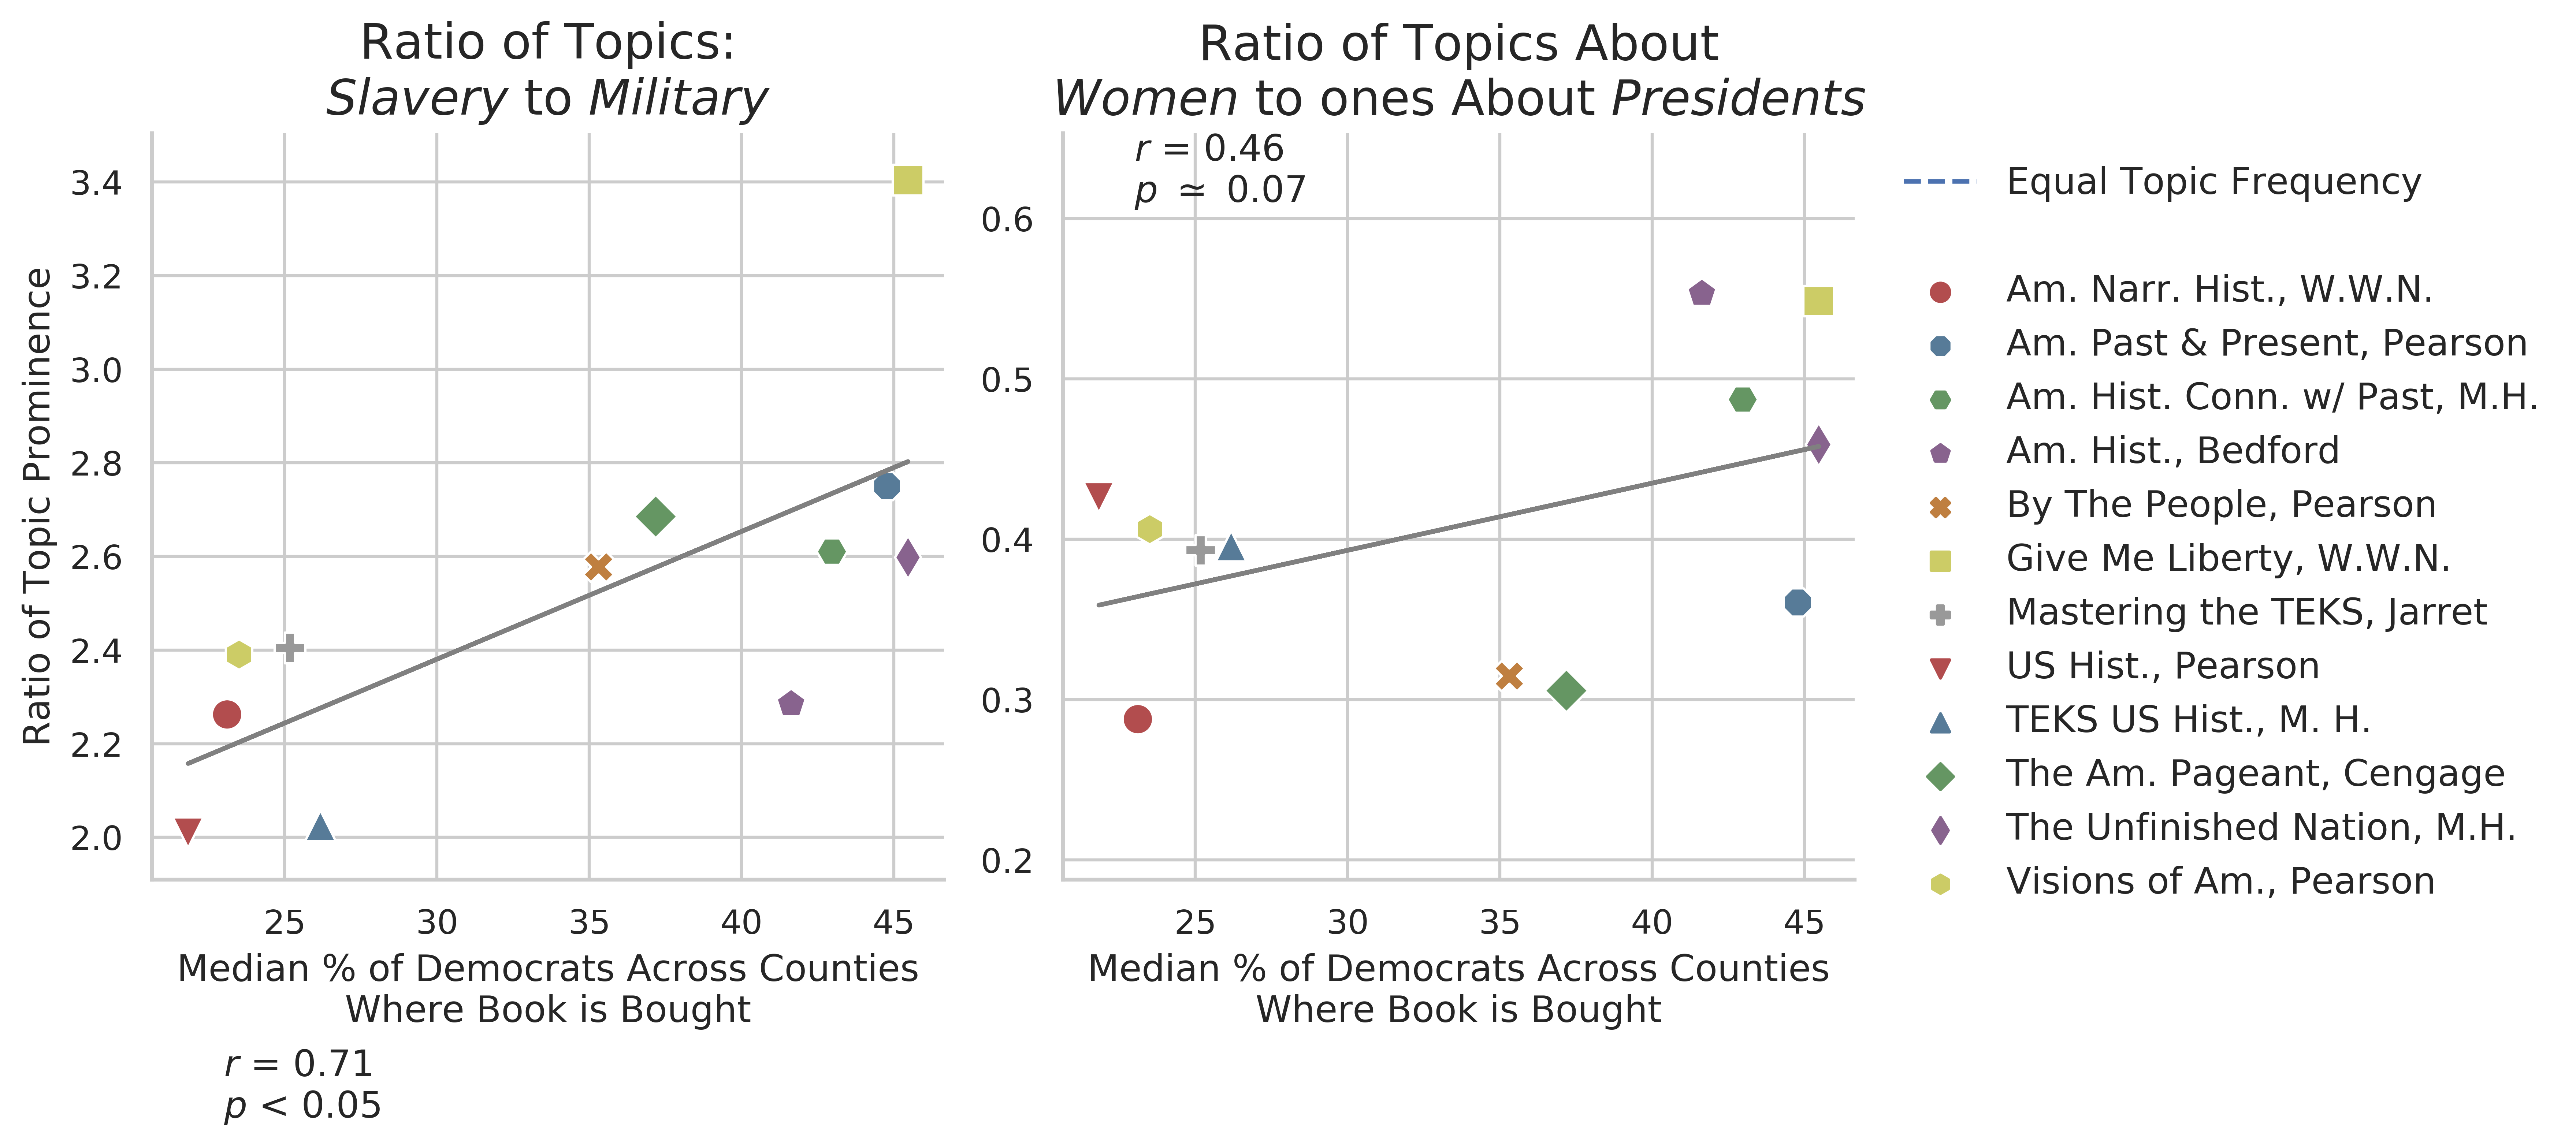

In [39]:
sns.set(style='whitegrid')
sns.despine()
fontsize=12
fig = plt.figure(figsize=(10, 4.5), dpi=600)
gs = gridspec.GridSpec(nrows=1, ncols=2, figure=fig, wspace=0.15)
ax1 = fig.add_subplot(gs[0, 0])
title1 = "Ratio of Topics:\n$\it{"+name1 + "}$ to $\it{"+name2+"}$"
plot_on_axis(slavery_df, ax1, title1, fontsize=fontsize, show_ylabel=True,
             p_value_show="< 0.05", p_val_pos=1.4)
ax2 = fig.add_subplot(gs[0, 1:3])
title2 = "Ratio of Topics About\n$\it{Women}$ to ones About $\it{Presidents}$"
plot_on_axis(women_df, ax2, title2, show_legend="full", fontsize=fontsize, show_ylabel=False,
             p_value_show="$\simeq$ 0.07", p_val_pos=.61)
l = plt.legend(bbox_to_anchor=(1.02,1), loc="upper left", frameon=False, fontsize=fontsize)
l.texts[1].set_text('')
plt.savefig("results/figure7_topic_ratios.pdf", dpi=800, format="pdf", bbox_inches="tight")

# Most prominent topics

In [71]:
def get_most_prominent(num_topics):
    allt = np.zeros((len(titles)-1, num_topics))
    idx = 0
    for title in titles:
        if title == 'all':
            continue
        allt[idx, :] = load_counts(title)
        allt[idx, :] /= np.sum(allt[idx, :] )
        idx +=1
    across_books = np.mean(allt, axis=0)
    for t in across_books.argsort()[::-1]:
        print(round(across_books[t], 4),'\t', topic_names[str(t)])

In [72]:
get_most_prominent(num_topics)

0.0347 	 problem,face,fear,econom,seem,howev,even,critic,despit,effort
0.0306 	 freedom,idea,liberti,individu,societi,equal,peopl,social,believ,polit
0.0287 	 centuri,polit,movement,chang,era,earli,decad,revolut,debat,social
0.0286 	 inform,read,sourc,event,chapter,map,question,use,write,think
0.0283 	 man,said,everi,men,god,wrote,upon,countri,one,negro
0.0281 	 hand,hous,man,cloth,old,boy,day,fire,night,back
0.0277 	 cultur,chang,societi,differ,industri,life,economi,develop,new,econom
0.0271 	 peopl,want,way,make,thing,get,other,time,might,one
0.0261 	 popular,imag,music,artist,show,publish,book,paint,newspap,life
0.026 	 armi,general,confeder,union,soldier,troop,forc,battl,british,command
0.0236 	 slaveri,southern,lincoln,union,state,northern,south,territori,reconstruct,republican
0.0232 	 kennedi,presid,vietnam,reagan,nixon,eisenhow,bush,johnson,administr,soviet
0.0224 	 right,govern,state,constitut,power,feder,law,citizen,protect,congress
0.0213 	 act,feder,program,congress,pass,go

In [73]:
def get_most_prominent2(num_topics):
    counts = load_counts()
    print(counts)
    proportion = counts / counts.sum()
    for t in proportion.argsort()[::-1]:
        print(round(proportion[t], 4),'\t', topic_names[str(t)])

In [74]:
get_most_prominent2(num_topics)

[10676. 17201. 11127. 20719. 12965. 12079. 13724. 13145. 13894. 13919.
 16320. 11681. 13094. 23092. 12148. 18422. 13494. 28249. 24657. 22651.
 12298. 15637. 20232. 21432. 16280. 14566. 13556. 15387. 13404. 15557.
 16432. 17051. 10786. 21855. 14117. 14715. 21109. 11818. 16290. 13848.
 12366.  9444. 22108. 14328. 12915. 18909. 14753. 14320. 16320. 14502.]
0.0358 	 problem,face,fear,econom,seem,howev,even,critic,despit,effort
0.0312 	 freedom,idea,liberti,individu,societi,equal,peopl,social,believ,polit
0.0292 	 centuri,polit,movement,chang,era,earli,decad,revolut,debat,social
0.0287 	 man,said,everi,men,god,wrote,upon,countri,one,negro
0.028 	 hand,hous,man,cloth,old,boy,day,fire,night,back
0.0277 	 cultur,chang,societi,differ,industri,life,economi,develop,new,econom
0.0271 	 inform,read,sourc,event,chapter,map,question,use,write,think
0.0267 	 peopl,want,way,make,thing,get,other,time,might,one
0.0262 	 popular,imag,music,artist,show,publish,book,paint,newspap,life
0.0256 	 armi,general,